In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.font_manager as font_manager
import datetime
from matplotlib.ticker import FormatStrFormatter
import statsmodels.api as sm

C:\Users\andrgome\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\andrgome\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\andrgome\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


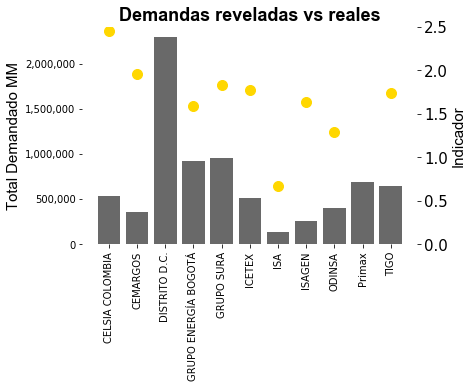

In [2]:
#Estimaciones de demanda vs realidad

#OJO REVISAR ACÁ LA LLAVE - PONER DE PRONTO EMISOR + FECHA Y AGRUPAR ASÍ

df_estimaciones = pd.read_csv('C:/Users/andrgome/DEUDA PRIVADA/BDMontoSubastaEstimado.csv',encoding='latin-1',
                 dtype={'MONTODEMANDADO_VB': 'float','MONTOESTIMADO_VB': 'float' })

d = {'MONTODEMANDADO_VB':'Total Demandado', 'MONTOESTIMADO_VB':'Total Estimado'} #dictionary to apply the aggregate
dff2=(df_estimaciones.groupby('EMISOR', as_index=False).agg({'MONTODEMANDADO_VB':'sum', 'MONTOESTIMADO_VB':'sum'}).rename(columns=d))
dff2['Indicador1'] = dff2['Total Demandado']/dff2['Total Estimado']
dff2.style.format({"Total Demandado": "{:0,.0f}","Total Estimado": "{:0,.0f}","Relación": "{:0,.2f}"}).hide_index()
# dff2= dff2.sort_values('Años_vcto')


fig = plt.figure()
ax1 = plt.subplot(111,frameon=False)

ax1.bar(dff2['EMISOR'],dff2['Total Demandado'],color='dimgrey')
ax1.set_ylabel('Total Demandado MM',fontname = "Arial",fontsize=15, color='black')
ax1.tick_params(axis='y', color = 'black', labelcolor='black')
plt.xticks(rotation=90)
ax1.axis([None, None, None, None])
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,.0f}'.format(y) ))
ax1.title.set_fontfamily('arial')
ax1.xaxis.set_major_locator(plt.MaxNLocator(5))
vals = ax1.get_yticks()
ax1.tick_params(axis='y', color = 'black', labelcolor='black')
ax1.set_yticklabels(['{:0,.0f}'.format(x/1000000) for x in vals])
plt.title('Demandas reveladas vs reales',fontsize=18,weight="bold")

ax2 = ax1.twinx()
ax2.plot(dff2['EMISOR'],dff2['Indicador1'],marker='o', linestyle='None',color='gold',markersize=10)
ax2.set_ylabel('Indicador',fontname = "Arial", fontsize=15,color='black')
ax2.tick_params(axis='y', color = 'black', labelcolor='black')
ax2.axis([None, None, 0, 2.5])
ax2.tick_params(axis="y", labelsize=15)
ax2.tick_params(axis="y", labelsize=15)

plt.box(on=None)
plt.show()

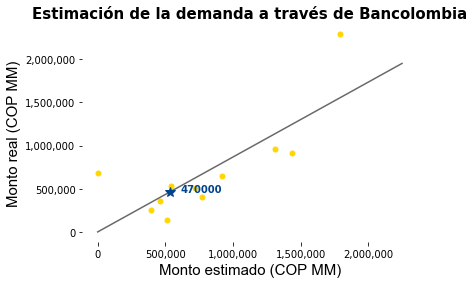

In [3]:
X = dff2['Total Estimado']
y = dff2['Total Demandado']

# Note the difference in argument order
model = sm.OLS(y, X).fit()

x_ajust = np.linspace(0, 900000, 50000)
y_ajust = model.predict(x_ajust) # make the predictions by the model
demanda_inicial =215000
demanda_estimada = model.predict(demanda_inicial)
demanda_estimada2 = np.round(demanda_estimada[0]/10000, 0)*10000


fig = plt.figure()
ax1 = plt.subplot(111,frameon=False)

ax1.plot(dff2['Total Estimado']/1000000,dff2['Total Demandado']/1000000,marker='o', linestyle='None',color='gold',markersize=5)
ax1.plot(x_ajust,y_ajust,marker='None', linestyle='solid',color='dimgrey')
ax1.plot(demanda_inicial,demanda_estimada,marker='*', linestyle='solid',color='#00448d',markersize=10)
vals = ax1.get_yticks()
ax1.tick_params(axis='y', color = 'black', labelcolor='black')
ax1.set_xticklabels(['{:0,.0f}'.format(x) for x in vals])
ax1.set_yticklabels(['{:0,.0f}'.format(x) for x in vals])
ax1.set_xlabel('Monto estimado (COP MM)',fontname = "Arial", fontsize=15,color='black')
ax1.set_ylabel('Monto real (COP MM)',fontname = "Arial", fontsize=15,color='black')
plt.title('Estimación de la demanda a través de Bancolombia',fontsize=15,weight="bold")

plt.text(demanda_inicial+30000, demanda_estimada, '{0:.0f}'.format(demanda_estimada2), color='#00448d', fontsize=10,weight='bold')

plt.show()

In [4]:
# import xlwings as xw
# app = xw.App()
# book = xw.Book('G:/Estructuración y Estrategias de Negocio/Información y Mercados/Procesos/Ejecución/REM.xlsb', read_only= True )
# book = xw.Book('G:/Estructuración y Estrategias de Negocio/Información y Mercados/Procesos/Ejecución/REM.xlsb')
# sheet = book.sheets('Deuda Privada')

In [82]:
#Demandas por grupos de inversionitas
df_mineria_bonos = pd.read_csv('C:/Users/andrgome/DEUDA PRIVADA/BDMineria.csv',encoding='latin-1')
df_NITS = pd.read_csv('C:/Users/andrgome/DEUDA PRIVADA/NITs.csv',encoding='latin-1')

df_NITS['Nit_ajust'] = df_NITS['Nit-completo'].str[:9]
df_mineria_bonos['Número'] = df_mineria_bonos['Número'].astype(str)
df_mineria_bonos['Número'] = df_mineria_bonos['Número'].str[:9]
df_mineria_bonos['Fecha'] =  pd.to_datetime(df_mineria_bonos['Fecha'],dayfirst=True)
df_mineria_bonos = pd.merge(df_mineria_bonos,df_NITS, left_on='Número',right_on='Nit_ajust', how='left')


#Poner todo en minúscula
df_mineria_bonos['Sector2'] = df_mineria_bonos['Sector'].str.lower()
df_mineria_bonos['Sector2'].unique()


#Agrupar por tipo de inversionista

conditions = [
    (df_mineria_bonos['Sector2'] == '08-aseguradoras y soc. de capitalización') | (df_mineria_bonos['Sector2'] == '8.aseguradoras y sociedades de capitalización' ) ,
    (df_mineria_bonos['Sector2'] == '12-personas naturales nacionales y extranjeras') | (df_mineria_bonos['Sector2'] == '12-personas naturales nacionales y extranjeras')  | (df_mineria_bonos['Sector2'] == '12.personas naturales nacionales y extranjeras')| (df_mineria_bonos['Sector2'] == '09-posición propia scb, fiduciarias, afp y sociedades de servicios financieros') |(df_mineria_bonos['Sector2'] == '9.posición propia scb fiduciarias  afp y soc. de  serv. financieros')|(df_mineria_bonos['Sector2'] == '11-otras personas jurídicas')| (df_mineria_bonos['Sector2'] == '11.otras personas jurídicas')| (df_mineria_bonos['Sector2'] == '10.inversionista extranjero  persona jurídica'),    
    (df_mineria_bonos['Sector2'] == '01-fondos de inversión colectiva - scb') |(df_mineria_bonos['Sector2'] == '06-fideicomisos y consorcios')| (df_mineria_bonos['Sector2'] == '02-fondos de inversión colectiva - fiduciarias')| (df_mineria_bonos['Sector2'] == '03-otros - fondos de inversión colectiva')| (df_mineria_bonos['Sector2'] == '05-fondos mutuos de inversión')| (df_mineria_bonos['Sector2'] == '02-fondos de inversión colectiva - fiduciarias ( antes carteras colectivas)') |(df_mineria_bonos['Sector2'] ==  '01-fondos de inversión colectiva - scb ( antes carteras colectivas)') |(df_mineria_bonos['Sector2'] == '3.fondos de inversión colectiva. otros') |(df_mineria_bonos['Sector2'] ==  '2.fondos de inversión  colectiva. fiduciarias') |(df_mineria_bonos['Sector2'] == '6.fideicomisos y consorcios' )|(df_mineria_bonos['Sector2'] == '1.fondos de inversión colectiva. scb' )|(df_mineria_bonos['Sector2'] == '5.fondos mutuos de inversión' ) |(df_mineria_bonos['Sector2'] == '03-otros - fondos de inversión colectiva ( antes carteras colectivas)'),
    (df_mineria_bonos['Sector2'] == '07-establecimientos de crédito') |(df_mineria_bonos['Sector2'] == '7.establecimientos de crédito'),
    (df_mineria_bonos['Sector2'] == '04-fondos de pensiones y cesantías') |(df_mineria_bonos['Sector2'] == '04-fondos de pensiones y cesantías')|(df_mineria_bonos['Sector2'] == '4.fondos de pensiones y cesantias')|(df_mineria_bonos['Sector2'] == '4.fondos de pensiones  y cesantias'),
    ]  
     
choices = ['Aseguradoras','Pos Propia y Retail','Fics, PAs y Consorcios','Est Crédito','AFP']

df_mineria_bonos['Tipo_Agente'] = np.select(conditions, choices, default='Otros')


#AJUSTE DE NOMBRES QUE SON FICs O PAs

for i in range (0,df_mineria_bonos.shape[0]):
    if df_mineria_bonos['Nombre'].iloc[i] == 'PATRIMONIO AUTONOMOS SKANDIA SOCIEDAD FIDUCIARIA':
        df_mineria_bonos['Tipo_Agente'].iloc[i] = 'Fics, PAs y Consorcios'
    elif df_mineria_bonos['Nombre'].iloc[i] == 'PATRIMONIOS AUTONOMOS FIDUCIARIA COOMEVA SA':
        df_mineria_bonos['Tipo_Agente'].iloc[i] = 'Fics, PAs y Consorcios'
    elif df_mineria_bonos['Nombre'].iloc[i] == 'FIDUCIARIA DE OCCIDENTE S A FIDEICOMISO 3034 COVIA':
        df_mineria_bonos['Tipo_Agente'].iloc[i] = 'Fics, PAs y Consorcios'
    elif df_mineria_bonos['Nombre'].iloc[i] == 'FIDUCIARIA CENTRAL S.A. FIDUCENTRAL S.A.':
        df_mineria_bonos['Tipo_Agente'].iloc[i] = 'Fics, PAs y Consorcios'     
    elif df_mineria_bonos['Nombre'].iloc[i] == 'FIC ABIERTA FIDUCUENTA FIDUCOLOMBIA S.A.':
        df_mineria_bonos['Tipo_Agente'].iloc[i] = 'Fics, PAs y Consorcios' 
    elif df_mineria_bonos['Nombre'].iloc[i] == 'FIDUCIARIA SUPERIOR   F.C.O  SUPERIOR':
        df_mineria_bonos['Tipo_Agente'].iloc[i] = 'Fics, PAs y Consorcios'
    elif df_mineria_bonos['Nombre'].iloc[i] == 'FIDUCIAR S.A. FCO RENTAR   ':
        df_mineria_bonos['Tipo_Agente'].iloc[i] = 'Fics, PAs y Consorcios' 
    elif df_mineria_bonos['Nombre'].iloc[i] == 'FDO DE PENSIONES VOLUNTARIAS MULTIOPCION FIDUCIARI':
        df_mineria_bonos['Tipo_Agente'].iloc[i] = 'Fics, PAs y Consorcios'
    elif df_mineria_bonos['Nombre'].iloc[i] == 'FIDUCIARIA POPULAR S.A. FIDUCIAR S.A.   ':
        df_mineria_bonos['Tipo_Agente'].iloc[i] = 'Fics, PAs y Consorcios' 
    elif df_mineria_bonos['Nombre'].iloc[i] == 'CONSORCIO FIDUCIARIO PENSIONES HUILA 2006   ':
        df_mineria_bonos['Tipo_Agente'].iloc[i] = 'Fics, PAs y Consorcios' 
    elif df_mineria_bonos['Nombre'].iloc[i] == 'FIDUCIARIA S.A. FEICOMISO DEPTO SANTANDER   ':
        df_mineria_bonos['Tipo_Agente'].iloc[i] = 'Fics, PAs y Consorcios'     
        

C:\Users\andrgome\AppData\Roaming\Python\Python37\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


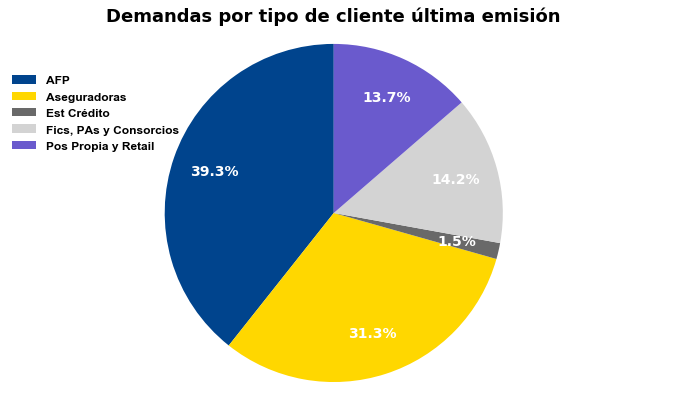

In [83]:
#FILTRAR PARA UN EMISOR DETERMINADO
df_mineria_bonos_emisor = df_mineria_bonos[df_mineria_bonos['Emisor']=='ISAGEN S.A. E.S.P.']
# df_mineria_bonos_emisor = df_mineria_bonos[df_mineria_bonos['Emisor']=='CONSTRUCCIONES EL CONDOR SA']


#FILTRAR PARA UNA FECHA ESPECÍFICA
# df_mineria_bonos_emisor = df_mineria_bonos_emisor[df_mineria_bonos_emisor['Fecha']=='2020-08-27']
df_mineria_bonos_emisor = df_mineria_bonos_emisor[df_mineria_bonos_emisor['Fecha']==datetime.datetime(2020,8,27)]


d = {'Monto Adjudicado':'Total Adjudicado', 'Monto Solicitado':'Total Demandado'} #dictionary to apply the aggregate
dff2_mineria_emisor=(df_mineria_bonos_emisor.groupby('Tipo_Agente', as_index=False).agg({'Monto Adjudicado':'sum', 'Monto Solicitado':'sum'}).rename(columns=d))
dff2_mineria_emisor['BTC'] = dff2_mineria_emisor['Total Demandado']/dff2_mineria_emisor['Total Adjudicado']
dff2_mineria_emisor.style.format({"Total Adjudicado": "{:0,.0f}","Total Demandado": "{:0,.0f}","BTC": "{:0,.2f}"}).hide_index()
# dff2_mineria_emisor= dff2_emisor.sort_values('Años_vcto')

fig = plt.figure()
ax1 = plt.subplot(111,frameon=False)

font = font_manager.FontProperties(family='arial',weight='bold', style='normal', size=12)

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = dff2_mineria_emisor['Tipo_Agente']
sizes = dff2_mineria_emisor['Total Demandado']
colors  = ("#00448d", "gold", "dimgrey", "lightgrey", "slateblue", "plum")

ax1.pie(sizes, labels=labels, colors=colors,autopct='%1.1f%%', radius=5000,startangle=90,textprops={'fontsize': 14,'color':'white','weight':'bold'}, pctdistance=0.75)
ax1.legend(frameon=False,prop=font,loc=1, bbox_to_anchor=(0.2, 0.9),markerscale=3)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Demandas por tipo de cliente última emisión',fontsize=18,weight="bold")


fig.tight_layout()
plt.subplots_adjust(wspace = 0.3,hspace = 0.4,bottom=0.1, right=1.4, top=1.4)
plt.show()

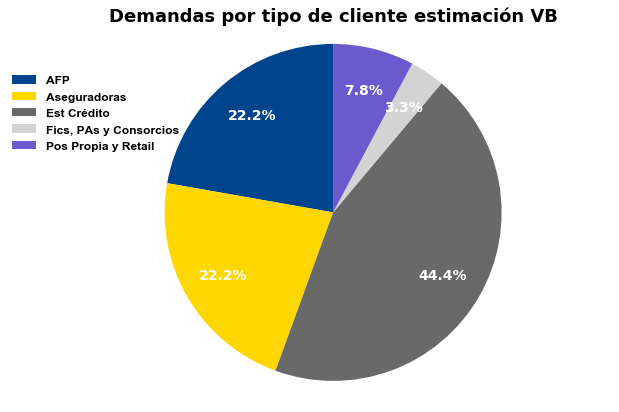

In [84]:
#DEMANDAS ESTIMADAS ANTES DE LA EMISIÓN

fig = plt.figure()
ax1 = plt.subplot(111,frameon=False)

font = font_manager.FontProperties(family='arial',weight='bold', style='normal', size=12)

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = dff2_mineria_emisor['Tipo_Agente']
sizes = [100,100,200,15,35]
colors  = ("#00448d", "gold", "dimgrey", "lightgrey", "slateblue")

ax1.pie(sizes, labels=labels, colors=colors,autopct='%1.1f%%', radius=5000,startangle=90,textprops={'fontsize': 14,'color':'white','weight':'bold'}, pctdistance=0.75)
ax1.legend(frameon=False,prop=font,loc=1, bbox_to_anchor=(0.2, 0.9),markerscale=3)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Demandas por tipo de cliente estimación VB',fontsize=18,weight="bold")


fig.tight_layout()
plt.subplots_adjust(wspace = 0.3,hspace = 0.4,bottom=0.1, right=1.4, top=1.4)
plt.show()


No handles with labels found to put in legend.
No handles with labels found to put in legend.


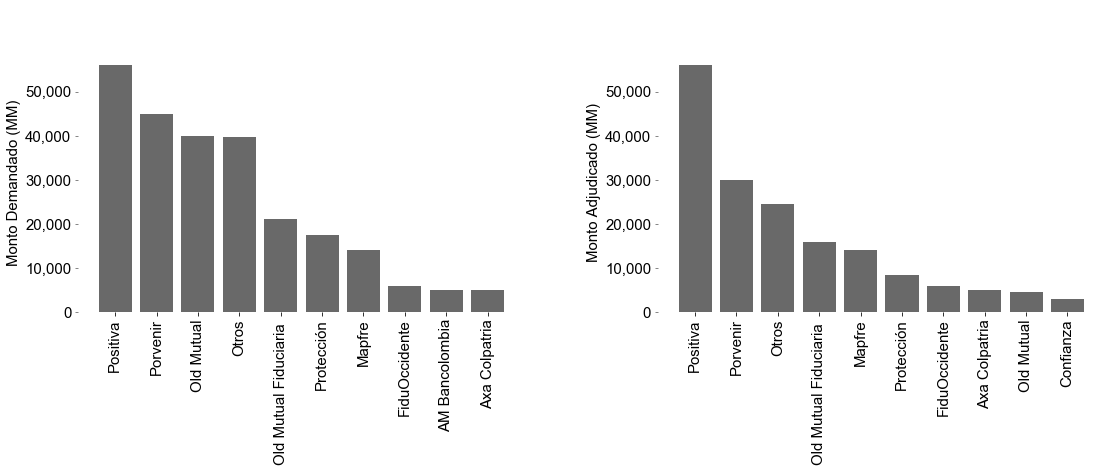

In [85]:
#GRÁFICO DE BARRAS DE LOS PRINCIPALES INVERSIONISTAS

df_mineria_bonos_emisor['Grupo Economico'] = df_mineria_bonos_emisor['Grupo Economico'].fillna('Otros')
dff_inversionistas1 = df_mineria_bonos_emisor.groupby('Grupo Economico').agg({'Monto Solicitado':'sum'})
dff_inversionistas1.sort_values(by='Monto Solicitado',ascending=False, inplace = True)
dff_inversionistas1 = dff_inversionistas1.head(10)

dff_inversionistas2 = df_mineria_bonos_emisor.groupby('Grupo Economico').agg({'Monto Adjudicado':'sum'})
dff_inversionistas2.sort_values(by='Monto Adjudicado',ascending=False, inplace = True)
dff_inversionistas2 = dff_inversionistas2.head(10)


fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1,frameon=False)

ax1.bar(dff_inversionistas1.index,dff_inversionistas1['Monto Solicitado']/1000000,color='dimgrey')
ax1.set_ylabel('Monto Demandado (MM)',fontname = "Arial",fontsize=15, color='black')
ax1.tick_params(axis='y', color = 'dimgrey', labelcolor='black')
ax1.legend(frameon=False,prop=font,loc=1, bbox_to_anchor=(0.5, 1.2),ncol=2,markerscale=3)
plt.xticks(rotation=90)
ax1.axis([None, None, None, None])
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,.0f}'.format(y) ))
ax1.title.set_fontfamily('arial')
plt.yticks(fontname = "Arial",fontsize=15)
plt.xticks(fontname = "Arial",fontsize=15)



ax2 = fig.add_subplot(1,2,2,frameon=False)
ax2.bar(dff_inversionistas2.index,dff_inversionistas2['Monto Adjudicado']/1000000,color='dimgrey')
ax2.set_ylabel('Monto Adjudicado (MM)',fontname = "Arial",fontsize=15, color='black')
ax2.tick_params(axis='y', color = 'dimgrey', labelcolor='black')
ax2.legend(frameon=False,prop=font,loc=1, bbox_to_anchor=(0.5, 1.2),ncol=2,markerscale=3)
plt.xticks(rotation=90)
ax2.axis([None, None, None, None])
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,.0f}'.format(y) ))
ax2.title.set_fontfamily('arial')

plt.yticks(fontname = "Arial",fontsize=15)
plt.xticks(fontname = "Arial",fontsize=15)

plt.subplots_adjust(wspace = 0.3,hspace = 0.8,bottom=0.1, right=2.5, top=1.0)

plt.show()

In [37]:
df_mineria_bonos['Grupo Economico'] = df_mineria_bonos['Grupo Economico'].fillna('Otros')

dff_inversionistas1 = df_mineria_bonos.groupby('Grupo Economico').agg({'Monto Solicitado':'sum'})
dff_inversionistas1.sort_values(by='Monto Solicitado',ascending=False, inplace = True)
dff_inversionistas1 = dff_inversionistas1.head(15)


dff_inversionistas2 = df_mineria_bonos.groupby('Grupo Economico').agg({'Monto Adjudicado':'sum'})
dff_inversionistas2.sort_values(by='Monto Adjudicado',ascending=False, inplace = True)
dff_inversionistas2 = dff_inversionistas2.head(15)

dff_inversionistas2
dff_inversionistas2.style.format({"Monto Adjudicado": "{:,.0f}"})

,Monto Adjudicado
Grupo Economico,
AM Bancolombia,"3,505,307,000,000"
Otros,"1,357,129,978,595"
Bancolombia,"1,264,661,228,000"
Fiduciaria La Previsora,"1,079,139,872,500"
Old Mutual,"770,106,159,238"
Seguros Alfa,"720,399,000,000"
Colfondos,"708,211,500,000"
FiduOccidente,"675,714,000,000"
Itau Fiduciaria,"605,048,000,000"


In [59]:
# for i in range(len(df_mineria_bonos['Emisor'].unique())):
#     print(df_mineria_bonos['Emisor'].unique()[i])

In [60]:
# df_mineria_bonos_emisor[df_mineria_bonos_emisor['Tipo_Agente']=='Otros']['Nombre'].unique()
# df_mineria_bonos_emisor.columns

# df_nueva.to_csv(r'C:/Users/andrgome/DEUDA PRIVADA/BDMineria_nueva.csv',encoding='latin-1')


# prueba = df_mineria_bonos_emisor[(df_mineria_bonos_emisor['Tipo_Agente']=='Otros')&(df_mineria_bonos_emisor['Nombre']=='UNIVERSIDAD TECNOLOGICA DE PEREIRA')]
# prueba['Monto Solicitado'].sum()

# prueba = df_mineria_bonos_emisor[df_mineria_bonos_emisor['Tipo_Agente']=='Pos Propia y Retail']
# prueba = df_mineria_bonos_emisor[df_mineria_bonos_emisor['Tipo_Agente']=='Otros']
# prueba['Nombre'].unique()
# prueba['Sector2'].iloc[0]


In [128]:
#NECESITAMOS PONER LA TASA DE CORTE DE CADA EMISIÓN YA QUE EN df_mineria_bonos NO ESTÁ
#PARA ESO TRAEMOS LA INFORMACIÓN DE LA BASE DE DATOS BD_Emisiones_series
#CREAMOS UN ID con el nombre del emisor, la fecha de la emisión y la indexación de la serie

df_emisiones = pd.read_csv('C:/Users/andrgome/DEUDA PRIVADA/BD_Emisiones_series.csv',encoding='latin-1')
df_emisiones['FechaEmisión'] = pd.to_datetime(df_emisiones['FechaEmisión'],dayfirst=True)
df_emisiones['Plazo'] = df_emisiones['Plazo'].str.replace('Años','')
df_emisiones['Plazo'] = df_emisiones['Plazo'].str.replace('años','')
df_emisiones['Plazo'] = df_emisiones['Plazo'].str.replace('año','')
df_emisiones['Plazo'] = df_emisiones['Plazo'].astype(float)

df_emisiones['ID'] = df_emisiones['Nombre_largo'] + "-" + df_emisiones['FechaEmisión'].apply(lambda x: str(x)) + "-"+ df_emisiones['Tasa']+"-"+df_emisiones['Plazo'].apply(lambda x: str(x))


df_mineria_bonos['Emisión (años)'] = df_mineria_bonos['Emisión (años)'].astype(float)
df_mineria_bonos['ID'] =  df_mineria_bonos['Emisor']+ "-" + df_mineria_bonos['Fecha'].apply(lambda x: str(x)) + "-"+ df_mineria_bonos['Tipo Tasa']+"-"+df_mineria_bonos['Emisión (años)'].apply(lambda x: str(x))

#Juntamos las dos bases de datos para obtener la tasa de corte
df_mineria_bonos2 = pd.merge(df_mineria_bonos,df_emisiones[['ID','Tasa de Corte']], left_on='ID',right_on='ID', how='left')

#Convertimos 
df_mineria_bonos2['Tasa Demandada'] = df_mineria_bonos2['Tasa Demandada'].astype(float)
df_mineria_bonos2['Tasa de Corte'] = df_mineria_bonos2['Tasa de Corte'].astype(float)
df_mineria_bonos2['Tasa de Corte'] = df_mineria_bonos2['Tasa de Corte']*100
df_mineria_bonos2['Distancia_vs_corte'] = df_mineria_bonos2['Tasa Demandada']/df_mineria_bonos2['Tasa de Corte']-1

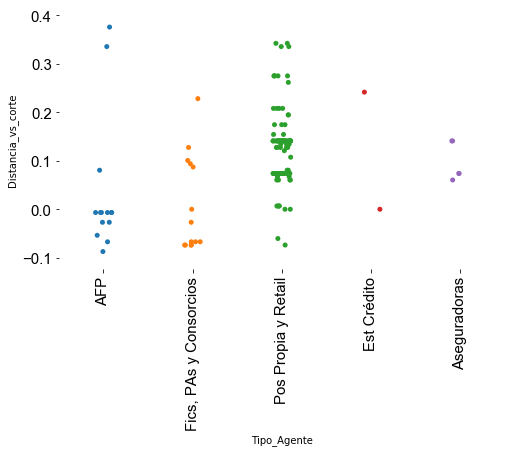

In [140]:
muestra = df_mineria_bonos2[df_mineria_bonos2['Emisor']=='BANCO W S.A.']
muestra = muestra[muestra['Fecha']==datetime.datetime(2021,2,11)]
# muestra

fig = plt.figure()
ax = fig.add_subplot(1, 2, 1,frameon=False)

ax = sns.stripplot(x="Tipo_Agente", y="Distancia_vs_corte", data=muestra)

# ax2.bar(dff_inversionistas2.index,dff_inversionistas2['Monto Adjudicado']/1000000,color='dimgrey')
# ax2.set_ylabel('Monto Adjudicado (MM)',fontname = "Arial",fontsize=15, color='black')
# ax2.tick_params(axis='y', color = 'dimgrey', labelcolor='black')
# ax2.legend(frameon=False,prop=font,loc=1, bbox_to_anchor=(0.5, 1.2),ncol=2,markerscale=3)
plt.xticks(rotation=90)
# ax2.axis([None, None, None, None])
# ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,.0f}'.format(y) ))
# ax2.title.set_fontfamily('arial')

plt.yticks(fontname = "Arial",fontsize=15)
plt.xticks(fontname = "Arial",fontsize=15)

plt.subplots_adjust(wspace = 0.3,hspace = 0.8,bottom=0.1, right=2.5, top=1.0)

plt.show()